In [63]:
%pip install dateutil

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement dateutil (from versions: none)
ERROR: No matching distribution found for dateutil

[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\sabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# DATA

In [65]:
df1 = pd.read_csv('TimeSeries.csv')

In [66]:
df1 = df1.drop(['Date'], axis='columns')

In [67]:
df1.head(10)

,Value
0,3.526591
1,3.180891
2,3.252221
3,3.611003
4,3.565869
5,4.306371
6,5.088335
7,2.814520
8,2.985811
9,3.204780


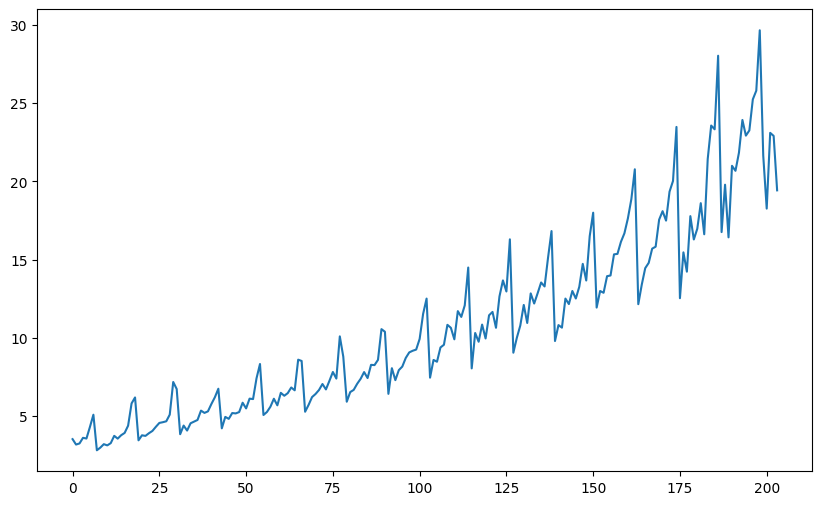

In [68]:
plt.rcParams.update({'figure.figsize': (10,6)})
plt.plot(df1['Value'])

In [69]:
df = df1.copy()

In [70]:
# fit2 = Holt(df, exponential=True).fit()
# df1 = pd.DataFrame(fit2.fittedvalues, columns=['Value'])

In [71]:
# Multiplicative Decomposition
mul_result = seasonal_decompose(df1['Value'], model='multiplicative', period=1)

# Additive Decomposition
add_result = seasonal_decompose(df1['Value'], model='additive', period=1)

Text(0.5, 0.98, '\nMultiplicative Decompose')

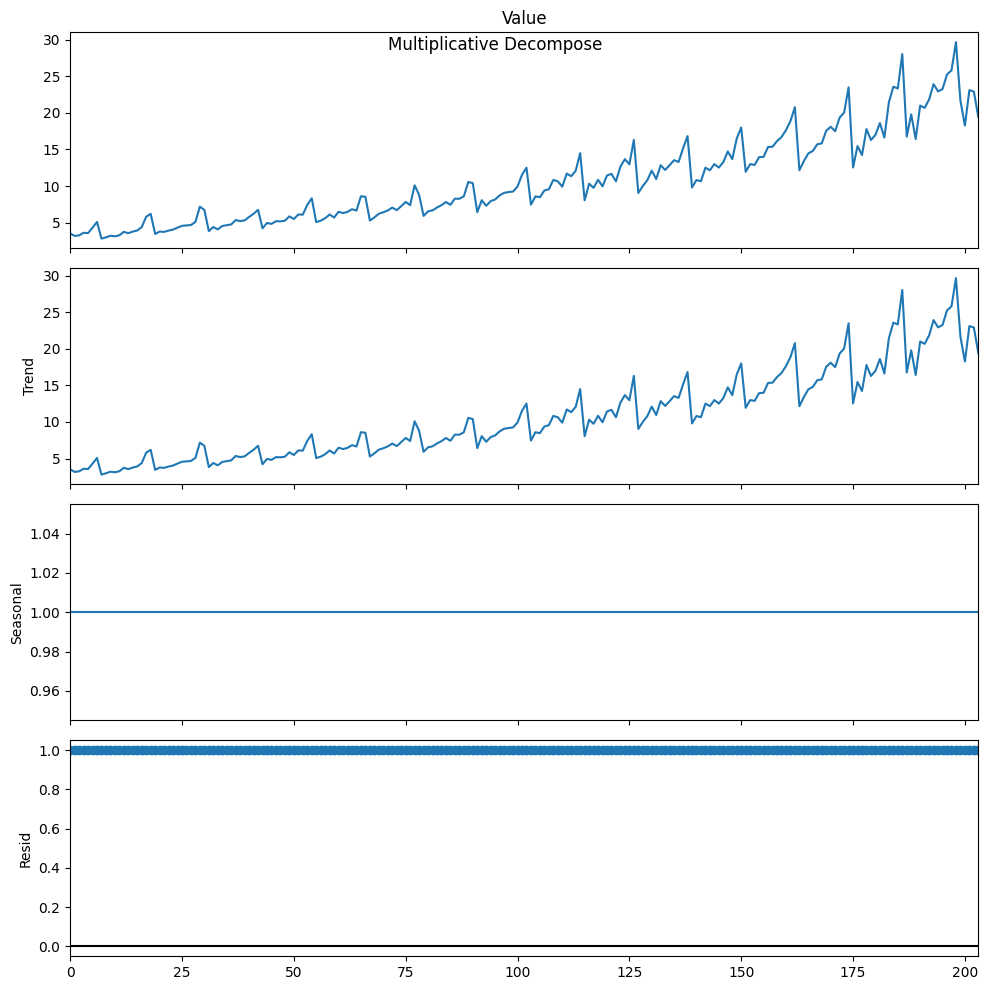

In [72]:
plt.rcParams.update({'figure.figsize': (10,10)})
mul_result.plot().suptitle('\nMultiplicative Decompose', fontsize=12)

Text(0.5, 0.98, '\nAdditive Decompose')

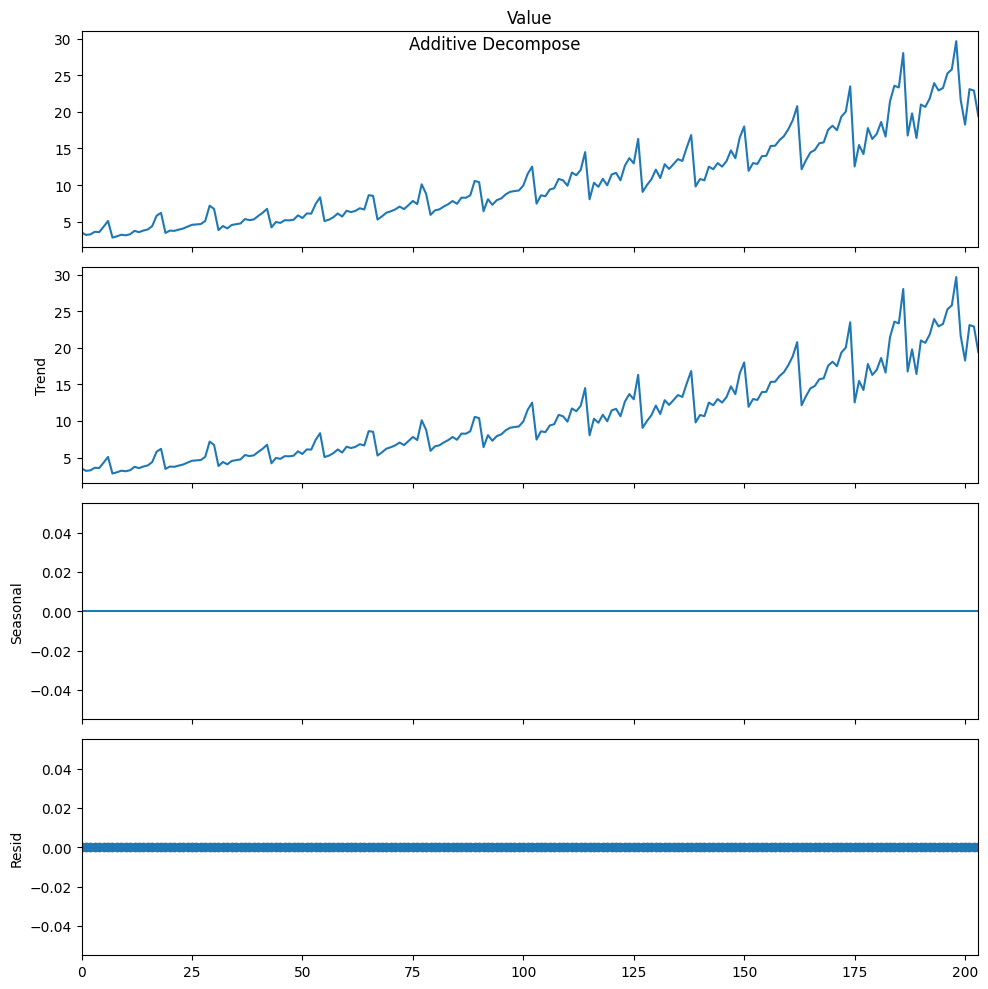

In [73]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)

In [74]:
# Additive
df_add = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
df_add.columns = ['seasonality','trend','residual','actual_values']
df_add

,seasonality,trend,residual,actual_values
0,0.0,3.526591,0.0,3.526591
1,0.0,3.180891,0.0,3.180891
2,0.0,3.252221,0.0,3.252221
3,0.0,3.611003,0.0,3.611003
4,0.0,3.565869,0.0,3.565869
...,...,...,...,...
199,0.0,21.654285,0.0,21.654285
200,0.0,18.264945,0.0,18.264945
201,0.0,23.107677,0.0,23.107677
202,0.0,22.912510,0.0,22.912510


In [75]:
# Multiplivative
df_mul = pd.concat([mul_result.seasonal, mul_result.trend, mul_result.resid, mul_result.observed], axis=1)
df_mul.columns = ['seasonality','trend','residual','actual_values']
df_mul

,seasonality,trend,residual,actual_values
0,1.0,3.526591,1.0,3.526591
1,1.0,3.180891,1.0,3.180891
2,1.0,3.252221,1.0,3.252221
3,1.0,3.611003,1.0,3.611003
4,1.0,3.565869,1.0,3.565869
...,...,...,...,...
199,1.0,21.654285,1.0,21.654285
200,1.0,18.264945,1.0,18.264945
201,1.0,23.107677,1.0,23.107677
202,1.0,22.912510,1.0,22.912510


# ADFULLER TEST OF STATIONARITY

In [76]:
from statsmodels.tsa.stattools import adfuller

In [77]:
# ADF Test - null hypothesis - non-stationary - if p-value < 0.05 reject null hypothesis
adfuller_result = adfuller(df1.Value.values, autolag='AIC')
print(f"ADF Statistic: {adfuller_result[0]}")
print(f"p-value: {adfuller_result[1]}")

for key, value in adfuller_result[4].items():
    print('Critical value:')
    print(f"{key}, {value}")

ADF Statistic: 3.1451856893067376
p-value: 1.0
Critical value:
1%, -3.465620397124192
Critical value:
5%, -2.8770397560752436
Critical value:
10%, -2.5750324547306476
